In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import symbols, Function, Eq, dsolve, Derivative, pprint
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp


$$
y_1^{V} - 6y_1^{'''} + 5y_1' = x_1^{4} + 4x_1^{3} + 6x_1^{2} + 4x_1 + 1
$$


Definujeme si
* $a = y_1^{'}$
* $dx = x_1^{'} = 1$
* $b = y_1^{''} = a^{'}$
* $c = y_1^{'''} = b^{'}$
* $d = y_1^{''''} = c^{'}$

Z toho dostaneme
* $d^{'} = 6c + 5a + x_1^4 + 4x_1^3 + 6x_1^2 + 4x_1 + 1$



Túto rovnicu si prepíšeme ako maticu $\vec{S}$
$$\vec{S} = \begin{bmatrix} y_1\\ a \\ b \\ c \\ d \\ x_1 \end{bmatrix} \hspace{10mm} \implies \hspace{10mm} \frac{d\vec{S}}{dt} = \begin{bmatrix} \dot{y_1}\\ \dot{a} \\ \dot{b} \\ \dot{c} \\ \dot{d} \\ \dot{x_1} \end{bmatrix} =  \begin{bmatrix} a\\ b \\ c \\ d \\ 6c + 5a + x^4 + 4x^3 + 6x^2 + 4x + 1 \\ dx \end{bmatrix}$$

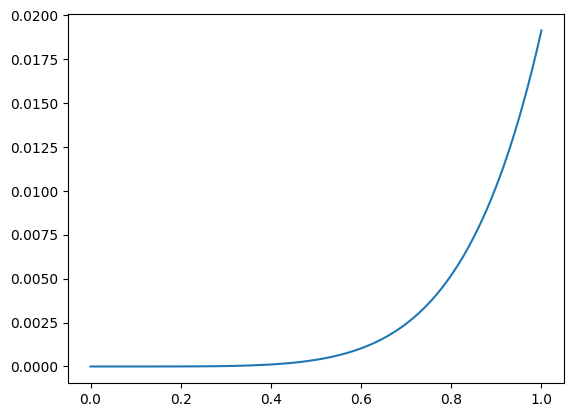

In [29]:
def dSdt(S, t):
    y1, a, b, c, d, x1 = S
    return[a,
           b,
           c,
           d,
           6*c + 5*a + x1**4 + 4*x1**3 + 6*x1**2 + 4*x1 + 1,
           1]
y1_0 = 0
a_0 = 0
b_0 = 0
c_0 = 0
d_0 = 0
x1_0 = 0
S_0 = (y1_0, a_0, b_0, c_0, d_0, x1_0)

t = np.linspace(0, 1, 100)
sol = odeint(dSdt, S_0, t)

plt.plot(t,sol.T[0])

Druhá metóda pomocou sympy (analytická)

Určíme charakteristickú rovnicu: $h^5−6h^3+5h=0$

Partikulárne riešenie:  $y_p(x) = Ax^4 + Bx^3 + Cx^2 + Dx + E = 0$

In [33]:
x = symbols('x')
y = Function('y')(x)

ode = Eq(Derivative(y, x, 5) - 6*Derivative(y, x, 3) + 5*Derivative(y, x), x**4 + 4*x**3 + 6*x**2 + 4*x + 1)
solution = dsolve(ode, y)

display(solution)

Eq(y(x), C1 + C2*exp(-x) + C3*exp(x) + C4*exp(-sqrt(5)*x) + C5*exp(sqrt(5)*x) + x**5/25 + x**4/5 + 34*x**3/25 + 82*x**2/25 + 1129*x/125)